<a href="https://colab.research.google.com/github/beve0x/DRL-stock_trading/blob/main/DRL_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
import requests
import pandas as pd
from datetime import datetime

# Your API key
api_key = 'MZTw3hotOqRyTydAYmqwGMWKhypFeAWF'  # Use your actual API key

# Define your list of tickers
tickers = [ "MSFT", "AAPL", "NVDA", "GOOGL", "GOOG", "AMZN", "META", "BRK-B", "LLY", "TSLA",
    "AVGO", "V", "JPM", "UNH", "WMT", "MA", "XOM", "JNJ", "PG", "HD",
    "COST", "MRK", "ORCL", "ABBV", "AMD", "CRM", "CVX", "ADBE", "BAC", "KO",
    "NFLX", "ACN", "PEP", "TMO", "MCD", "DIS", "CSCO", "LIN", "ABT", "TMUS",
    "INTC", "INTU", "DHR", "WFC", "QCOM", "VZ", "IBM", "CMCSA", "UBER", "NOW",
    "CAT", "NKE", "GE", "BX", "AMGN", "AMAT", "PFE", "AXP", "UNP", "TXN",
    "PM", "MS", "ISRG", "SYK", "SPGI", "LOW", "BKNG", "COP", "HON", "BA",
    "PLD", "GS", "UPS", "RTX", "T", "LRCX", "ELV", "BLK", "PANW", "NEE",
    "SCHW", "MDT", "TJX", "ETN", "PGR", "DE", "VRTX", "SBUX", "REGN", "ADP",
    "C", "CB", "LMT", "CI", "BMY", "MMC", "BSX", "CVS", "MDLZ", "ABNB",
    "ADI", "GILD", "MU", "KLAC", "AMT", "FI", "SNPS", "ZTS", "ANET", "CDNS",
    "HCA", "WM", "SHW", "ICE", "EQIX", "CME", "ITW", "SO", "GD", "CSX",
    "CMG", "MO", "DUK", "MAR", "BDX", "CL", "SLB", "MCO", "PH", "NOC",
    "TGT", "MCK", "EOG", "TDG", "USB", "PYPL", "MPC", "APH", "PSX", "CTAS",
    "ORLY", "TT", "ECL", "AON", "EMR", "NXPI", "FDX", "PNC", "LULU", "MNST",
    "ROP", "NSC", "RSG", "ADSK", "PCAR", "FTNT", "SPG", "FCX", "MSI", "PXD",
    "AJG", "EW", "WELL", "COF", "EL", "MMM", "OXY", "MET", "F", "PSA",
    "TRV", "CARR", "ROST", "HLT", "AIG", "DHI", "APD", "VLO", "CPRT", "TFC",
    "AZO", "ODFL", "GWW", "IDXX", "COR", "CCI", "AFL", "MSCI", "DXCM", "STZ",
    "NUE", "IQV", "GM", "HUM", "TEL", "DLR", "PAYX", "URI", "HES", "SRE",
    "MCHP", "KDP", "LEN", "O", "ALL", "KHC", "CHTR", "PCG", "AEP", "CNC",
    "BK", "CEG", "LVS", "OKE", "WMB", "FAST", "AME", "KMB", "LHX", "SYY",
    "AMP", "HSY", "JCI", "A", "PRU", "EA", "CTSH", "CTVA", "GEHC", "YUM",
    "DOW", "D", "FIS", "NEM", "CMI", "KMI", "OTIS", "KVUE", "GPN", "MPWR",
    "VRSK", "IT", "GIS", "IR", "ON", "EXC", "CSGP", "MLM", "PPG", "KR",
    "MRNA", "XEL", "NDAQ", "FICO", "CDW", "ROK", "VMC", "BIIB", "ACGL", "PWR",
    "EFX", "LYB", "EXR", "DLTR", "HAL", "FANG", "VICI", "WST", "XYL", "ED",
    "RCL", "FTV", "PEG", "DD", "BKR", "DG", "ANSS", "ADM", "HPQ", "WTW",
    "BF-B", "HIG", "DFS", "GLW", "KEYS", "DVN", "TTWO", "RMD", "CBRE", "DAL",
    "HWM", "ULTA", "ZBH", "TSCO", "MTD", "CAH", "EIX", "AVB", "RJF", "WAB",
    "WEC", "WY", "NVR", "CHD", "TROW", "WBD", "GRMN", "AWK", "BRO", "MOH",
    "ALGN", "BR", "BLDR", "FITB", "MTB", "SBAC", "DOV", "STE", "JBHT", "ILMN",
    "EQR", "APTV", "PHM", "EBAY", "DTE", "PTC", "STT", "ROL", "FE", "WRB",
    "VLTO", "ETR", "LYV", "AXON", "IFF", "GPC", "TDY", "LUV", "BAX", "CCL",
    "ES", "INVH", "ARE", "HPE", "VRSN", "IRM", "TRGP", "FLT", "BALL", "CBOE",
    "STLD", "LH", "HUBB", "DRI", "PPL", "CLX", "WAT", "PFG", "WBA", "TSN",
    "TYL", "COO", "K", "HBAN", "EXPE", "VTR", "EXPD", "WDC", "STX", "J",
    "NTAP", "AEE", "JBL", "CTRA", "ENPH", "FDS", "MKC", "CINF", "AKAM", "CNP",
    "HOLX", "IEX", "ATO", "OMC", "SWKS", "FSLR", "RF", "TXT", "AVY", "CMS",
    "LDOS", "L", "NTRS", "MAS", "CE", "EG", "BBY", "EPAM", "SYF", "HRL",
    "TER", "ESS", "NDSN", "NWSA", "NWS", "MAA", "LW", "PKG", "CF", "DPZ",
    "POOL", "MGM", "CFG", "TRMB", "VTRS", "DGX", "BEN", "UAL", "HST", "SNA",
    "FOXA", "FOX", "SWK", "GEN", "EQT", "ALB", "SJM", "PODD", "TAP", "MRO",
    "KIM", "LKQ", "BG", "ZBRA", "KEY", "INCY", "AMCR", "RVTY", "CAG", "JKHY",
    "CRL", "PNR", "UDR", "CPB", "LNT", "IPG", "AOS", "IP", "JNPR", "WYNN",
    "GL", "NRG", "TFX", "ALLE", "KMX", "RL", "EVRG", "DVA", "REG", "HII",
    "UHS", "TECH", "QRVO", "WRK", "FFIV", "AES", "PAYC", "NI", "CTLT", "CPT",
    "TPR", "MTCH", "BXP", "BBWI", "AAL", "MOS", "EMN", "BIO", "HSIC", "PEAK",
    "CZR", "ETSY", "AIZ", "APA", "PARA", "CHRW", "RHI", "FRT", "MKTX", "GNRC",
    "PNW", "MHK", "HAS", "BWA", "NCLH", "IVZ", "XRAY", "VFC", "CMA", "FMC",
    "ZION", "WHR"]
# Define the start and end dates for filtering
start_date = datetime.strptime('2020-01-01', '%Y-%m-%d').date()
end_date = datetime.strptime('2024-01-01', '%Y-%m-%d').date()

# Initialize a list to hold the combined data
combined_data = []

# Iterate over each ticker to fetch and process data
for ticker in tickers:
    # Fetch the company profile data to get the sector
    profile_response = requests.get(
        f"https://financialmodelingprep.com/api/v3/profile/{ticker}?apikey={api_key}"
    )
    profile_data = profile_response.json()
    sector = profile_data[0]['sector'] if profile_data else 'N/A'

    # Fetch Enterprise Value data
    ev_response = requests.get(
        f"https://financialmodelingprep.com/api/v3/enterprise-values/{ticker}?period=quarter&apikey={api_key}"
    )
    ev_data = ev_response.json()
    # Fetch EBITDA data
    ebitda_response = requests.get(
        f"https://financialmodelingprep.com/api/v3/income-statement/{ticker}?period=quarter&apikey={api_key}"
    )
    ebitda_data = ebitda_response.json()

    for ev_entry in ev_data:
        date = datetime.strptime(ev_entry['date'], '%Y-%m-%d').date()

        # Apply date filter
        if start_date <= date <= end_date:
            # Find matching EBITDA entry
            matching_ebitda = next((item for item in ebitda_data if item['date'] == ev_entry['date']), None)

            if matching_ebitda and matching_ebitda.get('ebitda') is not None and ev_entry.get('enterpriseValue') is not None:
                ebitda_value = matching_ebitda['ebitda']
                ev_value = ev_entry['enterpriseValue']

                # Calculate the EV/EBITDA ratio
                ev_ebitda_ratio = ev_value / ebitda_value if ebitda_value else None

                combined_data.append({
                    'Ticker': ticker,
                    'Date': ev_entry['date'],
                    'EV': ev_value,
                    'EBITDA': ebitda_value,
                    'EV/EBITDA': ev_ebitda_ratio,
                    'MarketCapitalization': ev_entry.get('marketCapitalization'),
                    'Sector': sector
                })

# Convert the combined data into a DataFrame
combined_df = pd.DataFrame(combined_data)

# Display the DataFrame
print(combined_df.head())


KeyError: 0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
# Specify the path within your Google Drive where you want to save the file
file_path = '/content/drive/My Drive/combined_df.csv'  # Update 'your_folder' to your specific folder path

# Save the DataFrame as a CSV file
combined_df.to_csv(file_path, index=False)

print(f'File saved successfully to {file_path}')


In [ ]:
import pandas as pd

# Adjust the path to match the location of your file in Google Drive
file_path = '/content/drive/My Drive/combined_df.csv'

# Load the CSV file into a DataFrame
combined_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(combined_df.head())


  Ticker        Date             EV       EBITDA  EV/EBITDA  \
0   MSFT  2023-12-31  2865798280000  33556000000  85.403453   
1   MSFT  2023-09-30  2350243750000  30816000000  76.266996   
2   MSFT  2023-06-30  2556835360000  26596000000  96.136087   
3   MSFT  2023-03-31  2179200300000  25901000000  84.135759   
4   MSFT  2022-12-31  1831366820000  24847000000  73.705752   

   MarketCapitalization      Sector  
0          2.794729e+12  Technology  
1          2.345707e+12  Technology  
2          2.531574e+12  Technology  
3          2.145240e+12  Technology  
4          1.786899e+12  Technology  


In [ ]:
#check to see if the sectors have been extracted accordingly
# Assuming combined_df is your DataFrame containing the 'Sector' column
unique_sectors = combined_df['Sector'].unique()

# Print the unique sector values
print(unique_sectors)


In [ ]:
#check for nulls
# Check for null values in each column
null_counts = combined_df.isnull().sum()

# Print the count of nulls for each column
print(null_counts)


Ticker                  0
Date                    0
EV                      0
EBITDA                  0
EV/EBITDA               4
MarketCapitalization    0
Sector                  0
dtype: int64


In [ ]:
# Check for zero values in each column
zero_counts = (combined_df == 0).sum()

# Print the count of zeros for each column
print(zero_counts)


Ticker                  0
Date                    0
EV                      0
EBITDA                  4
EV/EBITDA               0
MarketCapitalization    2
Sector                  0
dtype: int64


In [ ]:
combined_df

In [ ]:
import pandas as pd

# Assuming combined_df is your DataFrame

# List of specific columns to check for outliers
columns_to_check = ["EV", "EBITDA", "EV/EBITDA", "MarketCapitalization"]

# Define a function to detect and return rows with outliers using IQR
def detect_outliers_and_return_rows(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    # Identify rows where the column value is an outlier
    outlier_rows = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
    return outlier_rows

# Apply the function to each column and print the full rows for outliers
for column in columns_to_check:
    if column in combined_df.columns:
        outliers_df = detect_outliers_and_return_rows(combined_df, column)
        if not outliers_df.empty:
            print(f"Outliers in {column} (Total: {len(outliers_df)} rows):\n", outliers_df, "\n")
        else:
            print(f"No outliers detected in {column}.\n")
    else:
        print(f"Column {column} does not exist in the DataFrame.")


Outliers in EV (Total: 525 rows):
      Ticker        Date             EV       EBITDA   EV/EBITDA  \
0      MSFT  2023-12-31  2865798280000  33556000000   85.403453   
1      MSFT  2023-09-30  2350243750000  30816000000   76.266996   
2      MSFT  2023-06-30  2556835360000  26596000000   96.136087   
3      MSFT  2023-03-31  2179200300000  25901000000   84.135759   
4      MSFT  2022-12-31  1831366820000  24847000000   73.705752   
...     ...         ...            ...          ...         ...   
2164   PYPL  2021-09-30   305653540000   1374000000  222.455269   
2165   PYPL  2021-06-30   345397520000   1447000000  238.699046   
2166   PYPL  2021-03-31   288076320000   1408000000  204.599659   
2167   PYPL  2020-12-31   278627400000   1322000000  210.762027   
2168   PYPL  2020-09-30   233744160000   1310000000  178.430656   

      MarketCapitalization              Sector  
0             2.794729e+12          Technology  
1             2.345707e+12          Technology  
2            

Outliers exist - to find out how to handle these values in real time

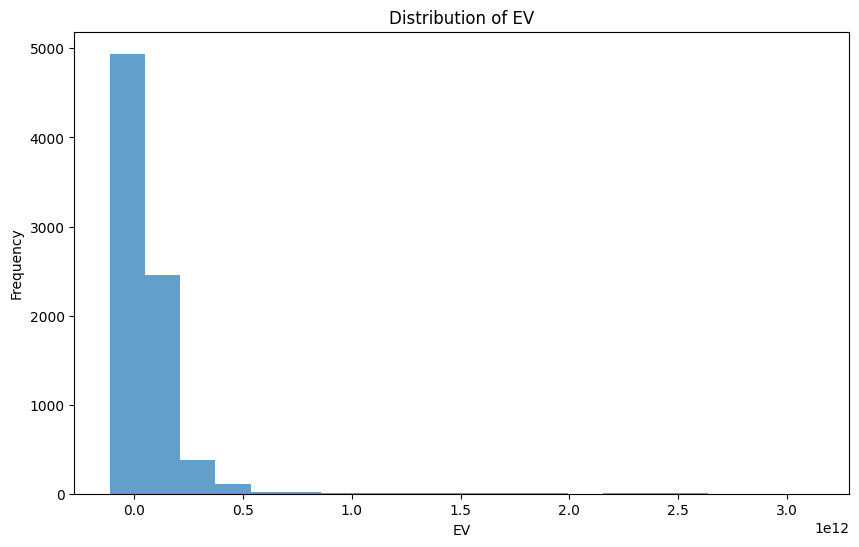

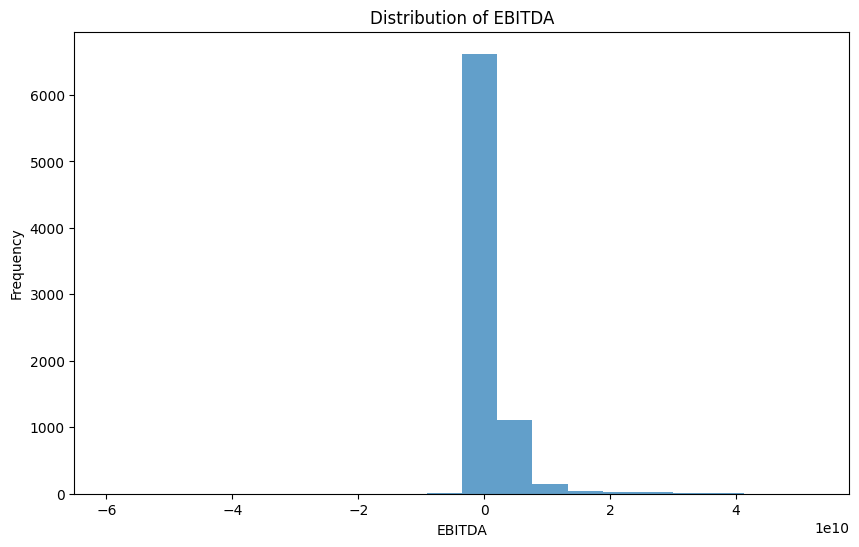

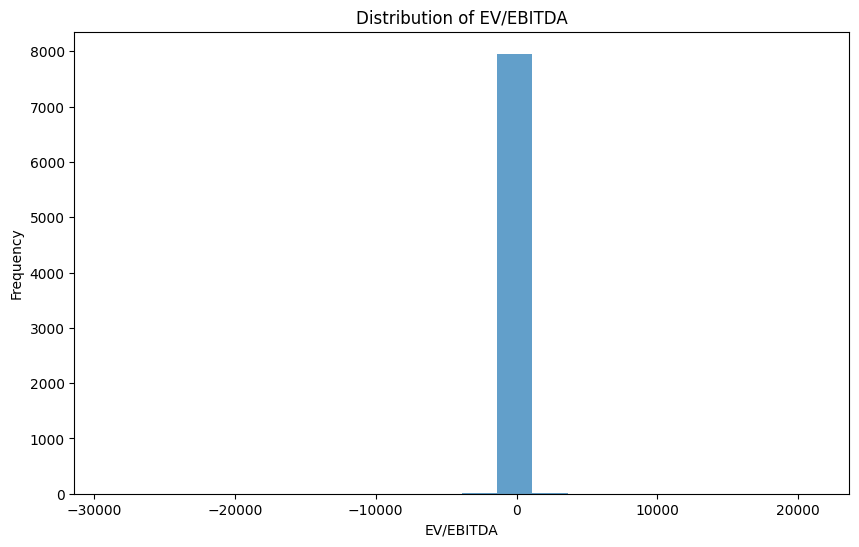

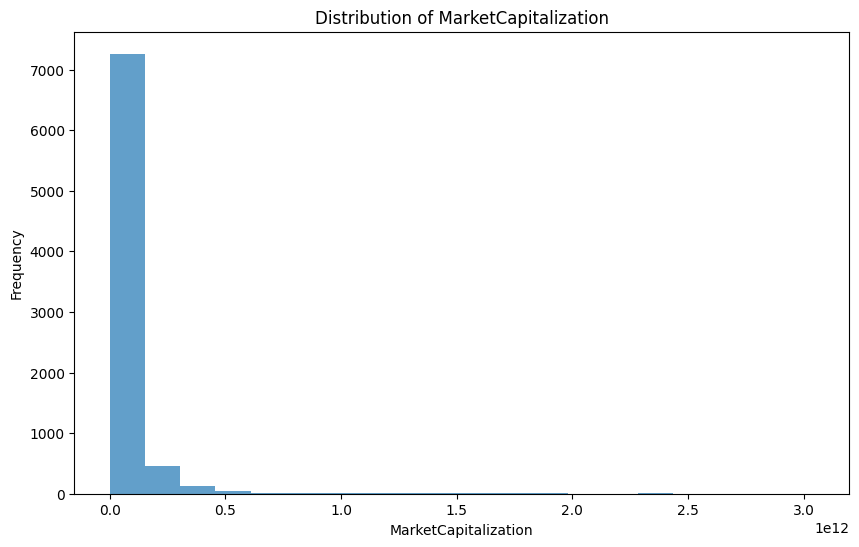

In [ ]:
import matplotlib.pyplot as plt

# List of specific columns you're interested in
columns_to_plot = ["EV", "EBITDA", "EV/EBITDA", "MarketCapitalization"]

# Loop through each specified column and plot the histogram
for column in columns_to_plot:
    # Check if the column exists to avoid KeyErrors
    if column in combined_df.columns:
        plt.figure(figsize=(10, 6))
        combined_df[column].hist(bins=20, alpha=0.7)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(False)
        plt.show()
    else:
        print(f"{column} not found in the DataFrame.")


Distrubution of all numerical values are highly skewed - to identify what steps to take to fix this before running it under the algorithm

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming combined_df is your DataFrame

# List of columns to normalize
columns_to_normalize = ["EV", "EBITDA", "EV/EBITDA", "MarketCapitalization"]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
combined_df[columns_to_normalize] = scaler.fit_transform(combined_df[columns_to_normalize])

# Check the first few rows to see the normalized data
print(combined_df.head())


  Ticker        Date        EV    EBITDA  EV/EBITDA  MarketCapitalization  \
0   MSFT  2023-12-31  0.919766  0.831613   0.579255              0.917850   
1   MSFT  2023-09-30  0.760632  0.807123   0.579072              0.770381   
2   MSFT  2023-06-30  0.824400  0.769406   0.579470              0.831424   
3   MSFT  2023-03-31  0.707837  0.763194   0.579230              0.704543   
4   MSFT  2022-12-31  0.600473  0.753774   0.579021              0.586856   

       Sector  
0  Technology  
1  Technology  
2  Technology  
3  Technology  
4  Technology  


In [ ]:
#check for nulls
# Check for null values in each column
null_counts = combined_df.isnull().sum()

# Print the count of nulls for each column
print(null_counts)



Ticker                  0
Date                    0
EV                      0
EBITDA                  0
EV/EBITDA               4
MarketCapitalization    0
Sector                  0
dtype: int64


Attach close price to the combined_df

In [ ]:
import requests

api_key = 'MZTw3hotOqRyTydAYmqwGMWKhypFeAWF'
tickers = [
    "MSFT", "AAPL", "NVDA", "GOOGL", "GOOG", "AMZN", "META", "BRK-B", "LLY", "TSLA",
    "AVGO", "V", "JPM", "UNH", "WMT", "MA", "XOM", "JNJ", "PG", "HD",
    "COST", "MRK", "ORCL", "ABBV", "AMD", "CRM", "CVX", "ADBE", "BAC", "KO",
    "NFLX", "ACN", "PEP", "TMO", "MCD", "DIS", "CSCO", "LIN", "ABT", "TMUS",
    "INTC", "INTU", "DHR", "WFC", "QCOM", "VZ", "IBM", "CMCSA", "UBER", "NOW",
    "CAT", "NKE", "GE", "BX", "AMGN", "AMAT", "PFE", "AXP", "UNP", "TXN",
    "PM", "MS", "ISRG", "SYK", "SPGI", "LOW", "BKNG", "COP", "HON", "BA",
    "PLD", "GS", "UPS", "RTX", "T", "LRCX", "ELV", "BLK", "PANW", "NEE",
    "SCHW", "MDT", "TJX", "ETN", "PGR", "DE", "VRTX", "SBUX", "REGN", "ADP",
    "C", "CB", "LMT", "CI", "BMY", "MMC", "BSX", "CVS", "MDLZ", "ABNB",
    "ADI", "GILD", "MU", "KLAC", "AMT", "FI", "SNPS", "ZTS", "ANET", "CDNS",
    "HCA", "WM", "SHW", "ICE", "EQIX", "CME", "ITW", "SO", "GD", "CSX",
    "CMG", "MO", "DUK", "MAR", "BDX", "CL", "SLB", "MCO", "PH", "NOC",
    "TGT", "MCK", "EOG", "TDG", "USB", "PYPL", "MPC", "APH", "PSX", "CTAS",
    "ORLY", "TT", "ECL", "AON", "EMR", "NXPI", "FDX", "PNC", "LULU", "MNST",
    "ROP", "NSC", "RSG", "ADSK", "PCAR", "FTNT", "SPG", "FCX", "MSI", "PXD",
    "AJG", "EW", "WELL", "COF", "EL", "MMM", "OXY", "MET", "F", "PSA",
    "TRV", "CARR", "ROST", "HLT", "AIG", "DHI", "APD", "VLO", "CPRT", "TFC",
    "AZO", "ODFL", "GWW", "IDXX", "COR", "CCI", "AFL", "MSCI", "DXCM", "STZ",
    "NUE", "IQV", "GM", "HUM", "TEL", "DLR", "PAYX", "URI", "HES", "SRE",
    "MCHP", "KDP", "LEN", "O", "ALL", "KHC", "CHTR", "PCG", "AEP", "CNC",
    "BK", "CEG", "LVS", "OKE", "WMB", "FAST", "AME", "KMB", "LHX", "SYY",
    "AMP", "HSY", "JCI", "A", "PRU", "EA", "CTSH", "CTVA", "GEHC", "YUM",
    "DOW", "D", "FIS", "NEM", "CMI", "KMI", "OTIS", "KVUE", "GPN", "MPWR",
    "VRSK", "IT", "GIS", "IR", "ON", "EXC", "CSGP", "MLM", "PPG", "KR",
    "MRNA", "XEL", "NDAQ", "FICO", "CDW", "ROK", "VMC", "BIIB", "ACGL", "PWR",
    "EFX", "LYB", "EXR", "DLTR", "HAL", "FANG", "VICI", "WST", "XYL", "ED",
    "RCL", "FTV", "PEG", "DD", "BKR", "DG", "ANSS", "ADM", "HPQ", "WTW",
    "BF-B", "HIG", "DFS", "GLW", "KEYS", "DVN", "TTWO", "RMD", "CBRE", "DAL",
    "HWM", "ULTA", "ZBH", "TSCO", "MTD", "CAH", "EIX", "AVB", "RJF", "WAB",
    "WEC", "WY", "NVR", "CHD", "TROW", "WBD", "GRMN", "AWK", "BRO", "MOH",
    "ALGN", "BR", "BLDR", "FITB", "MTB", "SBAC", "DOV", "STE", "JBHT", "ILMN",
    "EQR", "APTV", "PHM", "EBAY", "DTE", "PTC", "STT", "ROL", "FE", "WRB",
    "VLTO", "ETR", "LYV", "AXON", "IFF", "GPC", "TDY", "LUV", "BAX", "CCL",
    "ES", "INVH", "ARE", "HPE", "VRSN", "IRM", "TRGP", "FLT", "BALL", "CBOE",
    "STLD", "LH", "HUBB", "DRI", "PPL", "CLX", "WAT", "PFG", "WBA", "TSN",
    "TYL", "COO", "K", "HBAN", "EXPE", "VTR", "EXPD", "WDC", "STX", "J",
    "NTAP", "AEE", "JBL", "CTRA", "ENPH", "FDS", "MKC", "CINF", "AKAM", "CNP",
    "HOLX", "IEX", "ATO", "OMC", "SWKS", "FSLR", "RF", "TXT", "AVY", "CMS",
    "LDOS", "L", "NTRS", "MAS", "CE", "EG", "BBY", "EPAM", "SYF", "HRL",
    "TER", "ESS", "NDSN", "NWSA", "NWS", "MAA", "LW", "PKG", "CF", "DPZ",
    "POOL", "MGM", "CFG", "TRMB", "VTRS", "DGX", "BEN", "UAL", "HST", "SNA",
    "FOXA", "FOX", "SWK", "GEN", "EQT", "ALB", "SJM", "PODD", "TAP", "MRO",
    "KIM", "LKQ", "BG", "ZBRA", "KEY", "INCY", "AMCR", "RVTY", "CAG", "JKHY",
    "CRL", "PNR", "UDR", "CPB", "LNT", "IPG", "AOS", "IP", "JNPR", "WYNN",
    "GL", "NRG", "TFX", "ALLE", "KMX", "RL", "EVRG", "DVA", "REG", "HII",
    "UHS", "TECH", "QRVO", "WRK", "FFIV", "AES", "PAYC", "NI", "CTLT", "CPT",
    "TPR", "MTCH", "BXP", "BBWI", "AAL", "MOS", "EMN", "BIO", "HSIC", "PEAK",
    "CZR", "ETSY", "AIZ", "APA", "PARA", "CHRW", "RHI", "FRT", "MKTX", "GNRC",
    "PNW", "MHK", "HAS", "BWA", "NCLH", "IVZ", "XRAY", "VFC", "CMA", "FMC",
    "ZION", "WHR"
]

# Define the date range for fetching historical data
start_date = "2020-01-01"
end_date = "2024-01-01"

# Initialize an empty DataFrame to store the fetched data
historical_prices_df = pd.DataFrame()

for ticker in tickers:
    # Construct the API endpoint with the specified date range
    url = f"https://financialmodelingprep.com/api/v3/historical-price-full/{ticker}?from={start_date}&to={end_date}&apikey={api_key}"

    # Make the API request
    response = requests.get(url)
    data = response.json()

    # Check if the 'historical' key is in the response data
    if "historical" in data:
        # Convert the list of historical data to a DataFrame
        ticker_prices_df = pd.DataFrame(data["historical"])
        ticker_prices_df['Ticker'] = ticker  # Add a 'Ticker' column

        # Append the data to the main historical_prices_df
        historical_prices_df = pd.concat([historical_prices_df, ticker_prices_df], ignore_index=True)

In [ ]:
historical_prices_df

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,Ticker
0,2023-12-29,376.00,377.16,373.48,376.04,375.35,18730838,18730838,0.04,0.010638,375.6700,"December 29, 23",0.000106,MSFT
1,2023-12-28,375.37,376.46,374.16,375.28,374.59,14327013,14327013,-0.09,-0.023976,375.3175,"December 28, 23",-0.000240,MSFT
2,2023-12-27,373.69,375.06,372.81,374.07,373.38,14905412,14905412,0.38,0.101690,373.9075,"December 27, 23",0.001017,MSFT
3,2023-12-26,375.00,376.94,373.50,374.66,373.97,12673050,12673050,-0.34,-0.090667,375.0250,"December 26, 23",-0.000907,MSFT
4,2023-12-22,373.68,375.18,372.71,374.58,373.89,17107484,17107484,0.90,0.240850,374.0375,"December 22, 23",0.002409,MSFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501622,2020-01-08,147.17,150.24,147.17,149.40,125.94,540095,540095,2.23,1.520000,148.4950,"January 08, 20",0.015200,WHR
501623,2020-01-07,147.25,148.98,146.60,147.34,124.20,786627,786627,0.09,0.061121,147.5425,"January 07, 20",0.000611,WHR
501624,2020-01-06,144.66,147.75,143.41,147.29,124.16,560305,560305,2.63,1.820000,145.7775,"January 06, 20",0.018200,WHR
501625,2020-01-03,146.65,146.65,145.00,145.92,123.01,521111,521111,-0.73,-0.497780,146.0550,"January 03, 20",-0.004978,WHR


In [ ]:
import pandas as pd
import numpy as np

# Assuming 'combined_df' and 'historical_prices_df' are already defined and contain the relevant data

# Ensure 'Date' columns in both DataFrames are of datetime type for consistent merging
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
historical_prices_df['date'] = pd.to_datetime(historical_prices_df['date'])

# Sort 'historical_prices_df' by 'Ticker' and 'date' for efficient searching
historical_prices_df.sort_values(by=['Ticker', 'date'], inplace=True)
historical_prices_df['close'] = pd.to_numeric(historical_prices_df['close'], errors='coerce')

# Forward fill 'close' prices within 'historical_prices_df' to initially address NaN values
historical_prices_df['close'] = historical_prices_df.groupby('Ticker')['close'].ffill()

# Define a function to ensure no NaNs in 'close' by checking up to three days back
def fill_close_with_previous(row, historical_prices_df):
    if pd.notna(row['close']):
        return row['close']
    # If 'close' is NaN, attempt to find a non-NaN value from up to four days back
    ticker = row['Ticker']
    date = row['Date']
    prev_days_data = historical_prices_df[(historical_prices_df['Ticker'] == ticker) & (historical_prices_df['date'] < date)]
    for days_back in range(1, 5):  # Now checking up to four days back
        prev_day_data = prev_days_data.tail(days_back)
        if not prev_day_data.empty and pd.notna(prev_day_data.iloc[-1]['close']):
            return prev_day_data.iloc[-1]['close']
    return np.nan  # Return NaN if no valid 'close' price found in the last four days

# Merge 'close' from 'historical_prices_df' to 'combined_df' based on 'Ticker' and 'Date'
final_df = pd.merge(combined_df, historical_prices_df[['Ticker', 'date', 'close']], left_on=['Ticker', 'Date'], right_on=['Ticker', 'date'], how='left')

# Apply the 'fill_close_with_previous' function to handle NaN 'close' values
final_df['close_filled'] = final_df.apply(lambda row: fill_close_with_previous(row, historical_prices_df), axis=1)

# Drop the now redundant 'date' and original 'close' columns from the merge
final_df.drop(['date', 'close'], axis=1, inplace=True)

# Rename 'close_filled' back to 'close'
final_df.rename(columns={'close_filled': 'close'}, inplace=True)

# final_df now has the 'close' prices filled in, with NaNs addressed up to three days back


In [ ]:
import pandas as pd
import numpy as np

# Assuming 'combined_df' and 'historical_prices_df' are already defined and contain the relevant data

# Ensure 'Date' columns in both DataFrames are of datetime type for consistent merging
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
historical_prices_df['date'] = pd.to_datetime(historical_prices_df['date'])

# Sort 'historical_prices_df' by 'Ticker' and 'date' for efficient searching
historical_prices_df.sort_values(by=['Ticker', 'date'], inplace=True)
historical_prices_df['close'] = pd.to_numeric(historical_prices_df['close'], errors='coerce')

# Forward fill 'close' prices within 'historical_prices_df' to initially address NaN values
historical_prices_df['close'] = historical_prices_df.groupby('Ticker')['close'].ffill()

# Define a function to ensure no NaNs in 'close' by checking up to three days back
def fill_close_with_previous(row, historical_prices_df):
    if pd.notna(row['close']):
        return row['close']
    # If 'close' is NaN, attempt to find a non-NaN value from up to four days back
    ticker = row['Ticker']
    date = row['Date']
    prev_days_data = historical_prices_df[(historical_prices_df['Ticker'] == ticker) & (historical_prices_df['date'] < date)]
    for days_back in range(1, 5):  # Now checking up to four days back
        prev_day_data = prev_days_data.tail(days_back)
        if not prev_day_data.empty and pd.notna(prev_day_data.iloc[-1]['close']):
            return prev_day_data.iloc[-1]['close']
    return np.nan  # Return NaN if no valid 'close' price found in the last four days

# Apply the updated function to each row in final_df to handle NaN 'close' values
final_df['close'] = final_df.apply(lambda row: fill_close_with_previous(row, historical_prices_df), axis=1)

# Merge 'close' from 'historical_prices_df' to 'combined_df' based on 'Ticker' and 'Date'
final_df = pd.merge(combined_df, historical_prices_df[['Ticker', 'date', 'close']], left_on=['Ticker', 'Date'], right_on=['Ticker', 'date'], how='left')

# Apply the 'fill_close_with_previous' function to handle NaN 'close' values
final_df['close_filled'] = final_df.apply(lambda row: fill_close_with_previous(row, historical_prices_df), axis=1)

# Drop the now redundant 'date' and original 'close' columns from the merge
final_df.drop(['date', 'close'], axis=1, inplace=True)

# Rename 'close_filled' back to 'close'
final_df.rename(columns={'close_filled': 'close'}, inplace=True)

# final_df now has the 'close' prices filled in, with NaNs addressed up to three days back


KeyError: 'close'

In [ ]:
# Specify the path within your Google Drive where you want to save the file
file_path = '/content/drive/My Drive/final_df.csv'  # Update 'your_folder' to your specific folder path

# Save the DataFrame as a CSV file
final_df.to_csv(file_path, index=False)

print(f'File saved successfully to {file_path}')

File saved successfully to /content/drive/My Drive/final_df.csv


In [ ]:
import pandas as pd

# Adjust the path to match the location of your file in Google Drive
file_path = '/content/drive/My Drive/final_df.csv'

# Load the CSV file into a DataFrame
final_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(final_df.head())

  Ticker        Date        EV    EBITDA  EV/EBITDA  MarketCapitalization  \
0   MSFT  2023-12-31  0.919766  0.831613   0.579255              0.917850   
1   MSFT  2023-09-30  0.760632  0.807123   0.579072              0.770381   
2   MSFT  2023-06-30  0.824400  0.769406   0.579470              0.831424   
3   MSFT  2023-03-31  0.707837  0.763194   0.579230              0.704543   
4   MSFT  2022-12-31  0.600473  0.753774   0.579021              0.586856   

       Sector   close  
0  Technology  376.04  
1  Technology  315.75  
2  Technology  340.54  
3  Technology  288.30  
4  Technology  239.82  


In [ ]:
final_df

,Ticker,Date,EV,EBITDA,EV/EBITDA,MarketCapitalization,Sector,close
0,MSFT,2023-12-31,0.919766,0.831613,0.579255,0.917850,Technology,376.04
1,MSFT,2023-09-30,0.760632,0.807123,0.579072,0.770381,Technology,315.75
2,MSFT,2023-06-30,0.824400,0.769406,0.579470,0.831424,Technology,340.54
3,MSFT,2023-03-31,0.707837,0.763194,0.579230,0.704543,Technology,288.30
4,MSFT,2022-12-31,0.600473,0.753774,0.579021,0.586856,Technology,239.82
...,...,...,...,...,...,...,...,...
7996,WHR,2021-03-31,0.040616,0.538893,0.577983,0.004559,Consumer Cyclical,220.35
7997,WHR,2020-12-31,0.039713,0.540448,0.577846,0.003729,Consumer Cyclical,180.49
7998,WHR,2020-09-30,0.040047,0.538794,0.577943,0.003781,Consumer Cyclical,183.89
7999,WHR,2020-06-30,0.039262,0.534763,0.578315,0.002655,Consumer Cyclical,129.53


In [ ]:
final_df = final_df.rename(columns={'close': 'Close'})


In [ ]:
#check for nulls
# Check for null values in each column
null_counts = final_df.isnull().sum()

# Print the count of nulls for each column
print(null_counts)

Ticker                   0
Date                     0
EV                       0
EBITDA                   0
EV/EBITDA                4
MarketCapitalization     0
Sector                   0
Close                   20
dtype: int64


In [ ]:
# Drop rows with any null values in final_df
final_df = final_df.dropna()

# Modelling

Step 1: Define the Trading Environment overall

In [ ]:
# install relevant packages
import gym
from gym import spaces
import numpy as np
import pandas as pd


In [ ]:
# Define the Stock Trading Environment Class
class AdvancedStockTradingEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, df, initial_balance=10000000, lookback_window=50):
        super(AdvancedStockTradingEnv, self).__init__()

        self.df = df.sort_values(by='Date').reset_index(drop=True)
        self.initial_balance = initial_balance
        self.lookback_window = lookback_window

        # Initialize state trackers
        self.current_step = 0
        self.current_balance = initial_balance
        self.shares_held = 0
        self.current_nav = initial_balance
        self.total_shares_sold = 0
        self.total_sales_value = 0
        self.navs_over_time = []
        self.dates_over_time = []

        # Define action and observation space
        self.action_space = spaces.Discrete(3)  # 0: Hold, 1: Buy, 2: Sell
        self.observation_space = spaces.Box(low=0, high=np.inf, shape=(lookback_window + 4,), dtype=np.float32)

    def _next_observation(self):
        # Get the stock data for the last `lookback_window` days
        start = max(self.current_step - self.lookback_window + 1, 0)
        end = self.current_step + 1
        obs = np.zeros((self.lookback_window + 4,))

        # Fill the observation with historical closing prices
        historical_closes = self.df.loc[start:end, 'Close'].to_numpy()
        obs_length = min(len(historical_closes), self.lookback_window)
        obs[:obs_length] = historical_closes[-obs_length:]

        # Append the account information
        obs[self.lookback_window] = self.current_balance
        obs[self.lookback_window + 1] = self.shares_held
        obs[self.lookback_window + 2] = self.total_shares_sold
        obs[self.lookback_window + 3] = self.total_sales_value
        return obs

    def step(self, action):
        done = False

        # Check if the current_step is beyond the DataFrame's length
        if self.current_step >= len(self.df):
            done = True
            # You can handle the episode's end here. For example, reset the current_step or other necessary variables.
            return self._next_observation(), 0, done, {}
        # Update the current date using the 'Date' column of the dataframe
        self.current_date = self.df.iloc[self.current_step]['Date']

        current_price = self.df.iloc[self.current_step]['Close']
        previous_nav = self.current_nav

        if action == 1:  # Buy
            num_shares_can_buy = self.current_balance // current_price
            self.current_balance -= num_shares_can_buy * current_price
            self.shares_held += num_shares_can_buy
        elif action == 2 and self.shares_held > 0:  # Sell
            self.current_balance += self.shares_held * current_price
            self.total_shares_sold += self.shares_held
            self.total_sales_value += self.shares_held * current_price
            self.shares_held = 0

        # Update the NAV
        self.current_nav = self.current_balance + (self.shares_held * current_price)

        # Calculate the reward using the refined method
        reward = self.calculate_reward(previous_nav, self.current_nav)

        # Check if the episode is done, update steps, etc.
        self.current_step += 1
        if self.current_step >= len(self.df) - 1:
            done = True
            self.current_step = 0  # Reset for the next episode
        # At the end of the step method, append the current NAV to the tracking list
        self.navs_over_time.append(self.current_nav)
        return self._next_observation(), reward, done, {}
# Refining Reward Calculation
    # def calculate_reward(self, previous_nav, current_nav):
    #     # Calculate percentage change in NAV
    #     nav_change_percentage = (current_nav - previous_nav) / previous_nav if previous_nav > 0 else 0
    #     # Reward only positive NAV changes
    #     if nav_change_percentage > 0:
    #         reward = nav_change_percentage
    #     else:
    #         reward = 0  # or you could use a negative value to penalize loss

    #     # Example penalty for excessive trading (optional)
    #     trading_volume_change = abs(self.total_shares_sold - self.last_total_shares_sold)
    #     excessive_trading_penalty = trading_volume_change / self.total_shares_sold if self.total_shares_sold else 0

    #     # Final reward calculation
    #     reward = nav_change_percentage - excessive_trading_penalty
    #     return reward
    def calculate_reward(self, previous_nav, current_nav):
        # Calculate percentage change in NAV
        nav_change_percentage = (current_nav - previous_nav) / previous_nav if previous_nav > 0 else 0

        # Apply penalty (if any) only when there's a positive change to encourage maintaining gains
        if nav_change_percentage > 0:
            # Calculate excessive trading penalty
            trading_volume_change = abs(self.total_shares_sold - self.last_total_shares_sold)
            excessive_trading_penalty = trading_volume_change / self.total_shares_sold if self.total_shares_sold else 0
            # Apply penalty to the positive reward
            reward = nav_change_percentage - excessive_trading_penalty
        else:
            # Apply a small negative penalty for negative NAV changes
            reward = -0.01  # Adjust this value based on how strict you want the penalty to be

        return reward

    def reset(self):
        # Reset the state for a new episode
        self.current_step = 0
        self.current_balance = self.initial_balance
        self.shares_held = 0
        self.current_nav = self.initial_balance
        self.total_shares_sold = 0
        self.total_sales_value = 0
        self.last_total_shares_sold = 0  # Ensure to reset this for the reward calculation
        self.navs_over_time = []
        self.dates_over_time = []
        return self._next_observation()

    def render(self, mode='human', close=False):
        # Implement rendering (optional for training)  # This method can be used for rendering the environment's state if necessary.
        pass


In [ ]:
# import gym
# from gym import spaces
# import numpy as np
# import pandas as pd

# class StockTradingEnv(gym.Env):
#     """A stock trading environment for OpenAI gym"""
#     metadata = {'render.modes': ['human']}

#     def __init__(self, df):
#         super(StockTradingEnv, self).__init__()

#         self.df = df.sort_values(by='Date')
#         self.initial_cash = 10_000_000  # $10 million
#         self.cash_on_hand = self.initial_cash
#         self.shares_owned = dict.fromkeys(self.df['Ticker'].unique(), 0)
#         self.current_step = 0

#         # Action space: 0 = hold, 1 = buy, 2 = sell for each stock
#         self.action_space = spaces.MultiDiscrete([3] * len(self.shares_owned))

#         # Observation space: cash on hand, shares owned, and closing prices
#         self.observation_space = spaces.Box(low=0, high=np.inf, shape=(1 + 2 * len(self.shares_owned),), dtype=np.float32)

#         self.navs = []  # Track NAV over time

#     def _next_observation(self):
#         # Construct the observation vector
#         obs = np.zeros(1 + 2 * len(self.shares_owned))
#         obs[0] = self.cash_on_hand
#         for i, ticker in enumerate(self.shares_owned.keys()):
#             obs[1 + i] = self.shares_owned[ticker]
#             obs[1 + len(self.shares_owned) + i] = self.df[self.df['Ticker'] == ticker].iloc[self.current_step]['close']
#         return obs

#     def step(self, actions):
#         done = False
#         current_data = self.df.iloc[self.current_step]

#         for action, ticker in zip(actions, self.shares_owned.keys()):
#             price = current_data['close']
#             if action == 1:  # buy
#                 num_shares = self.cash_on_hand // (price * 1.001)  # Assume 0.1% transaction cost
#                 self.cash_on_hand -= num_shares * price * 1.001
#                 self.shares_owned[ticker] += num_shares
#             elif action == 2 and self.shares_owned[ticker] > 0:  # sell
#                 self.cash_on_hand += self.shares_owned[ticker] * price * 0.999  # Assume 0.1% transaction cost
#                 self.shares_owned[ticker] = 0

#         # Update NAV and calculate reward
#         previous_nav = self.navs[-1] if self.navs else self.initial_cash
#         current_nav = self.cash_on_hand + sum(self.shares_owned[ticker] * current_data['close'] for ticker in self.shares_owned.keys())
#         self.navs.append(current_nav)
#         reward = (current_nav - previous_nav) / previous_nav if previous_nav else 0

#         # Advance the step
#         self.current_step += 1
#         if self.current_step >= len(self.df):
#             done = True
#             self.current_step = 0  # Reset the step to prevent IndexError

#         return self._next_observation(), reward, done, {}


#     def reset(self):
#         self.cash_on_hand = self.initial_cash
#         self.shares_owned = dict.fromkeys(self.shares_owned, 0)
#         self.current_step = 0
#         self.navs = []
#         return self._next_observation()

#     def render(self, mode='human', close=False):
#         # Implement rendering for visualization (if needed)
#         pass


Step 2: Training the DRL Model

In [ ]:
import pandas as pd
final_df.reset_index(drop=True, inplace=True)

#temporal/ time based split
# Assuming 'final_df' is your DataFrame and it's sorted by 'Date'
final_df['Date'] = pd.to_datetime(final_df['Date'])

# Specify the split percentage (80% for training)
split_percentage = 0.8

# Calculate the index to split on
split_index = int(len(final_df) * split_percentage)

# Split the DataFrame
train_df = final_df.iloc[:split_index]
test_df = final_df.iloc[split_index:]

# Verify the split
print(f"Training Set Shape: {train_df.shape}")
print(f"Testing Set Shape: {test_df.shape}")


Training Set Shape: (6381, 8)
Testing Set Shape: (1596, 8)


In [ ]:
!pip install stable-baselines3
!pip install 'shimmy>=0.2.1'
!pip install gym


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 962.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [ ]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

# Assuming your AdvancedStockTradingEnv is imported or defined in the notebook/script

# Initialize the environment with the training data
env = AdvancedStockTradingEnv(df=train_df)

# Optionally, wrap your environment to work with vectorized data. This is useful for some algorithms and can enhance performance.
env = make_vec_env(lambda: env, n_envs=1)

# Initialize the model
model = PPO("MlpPolicy", env, verbose=1, tensorboard_log="./ppo_stock_trading_tensorboard/")

# Start the training
model.learn(total_timesteps=6381)  # Adjust the timesteps according to your need and computational capacity

# Save the trained model
model.save("ppo_stock_trading_model")


Using cpu device
Logging to ./ppo_stock_trading_tensorboard/PPO_5
-----------------------------
| time/              |      |
|    fps             | 685  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 533         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.011761075 |
|    clip_fraction        | 0.133       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | -0.00163    |
|    learning_rate        | 0.0003      |
|    loss                 | 14.6        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00762    |
|    value_loss           | 36.7        |
----------

Step 3: Evaluation and Analysis

In [ ]:
train_df = train_df.reset_index(drop=True)


In [ ]:
# Load the trained model
model = PPO.load("ppo_stock_trading_model")

# Initialize the test environment with test_df
test_env = AdvancedStockTradingEnv(df=test_df)

# Evaluate the model
# Note: The evaluate_policy method won't directly give us the NAV over time. We'll need to modify our environment or use a custom evaluation loop for that.
mean_reward, std_reward = evaluate_policy(model, test_env, n_eval_episodes=10, deterministic=True)
print(f"Mean reward: {mean_reward}, Std reward: {std_reward}")


Mean reward: 1452.205887124408, Std reward: 0.0


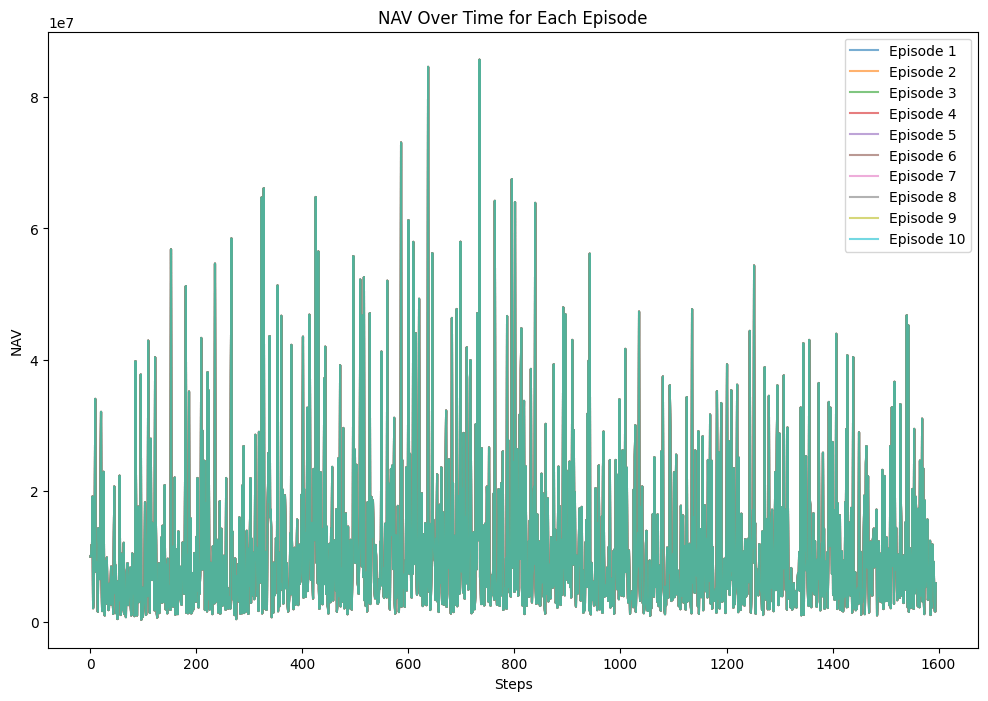

In [ ]:
import matplotlib.pyplot as plt

# Custom evaluation loop to track NAV
def evaluate_and_plot_nav(model, env, n_eval_episodes=10):
    navs_over_episodes = []  # To store NAVs for all episodes

    for episode in range(n_eval_episodes):
        obs = env.reset()
        navs = [env.current_nav]  # Initialize with the starting NAV
        done = False
        while not done:
            action, _states = model.predict(obs, deterministic=True)
            obs, rewards, done, info = env.step(action)
            navs.append(env.current_nav)  # Append current NAV after each step

        navs_over_episodes.append(navs)  # Store NAVs for this episode

    # Plotting
    plt.figure(figsize=(12, 8))
    for episode_navs in navs_over_episodes:
        plt.plot(episode_navs, alpha=0.6)  # Plot each episode's NAVs
    plt.title('NAV Over Time for Each Episode')
    plt.xlabel('Steps')
    plt.ylabel('NAV')
    plt.legend([f'Episode {i}' for i in range(1, n_eval_episodes + 1)])
    plt.show()

# Assuming `model` is your trained model and `test_env` is an instance of your test environment
test_env = AdvancedStockTradingEnv(df=test_df)
evaluate_and_plot_nav(model, test_env)


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def evaluate_and_plot_nav(model, env, n_eval_episodes=10):
    all_navs = []
    all_dates = []

    for _ in range(n_eval_episodes):
        obs = env.reset()
        done = False
        while not done:
            action, _states = model.predict(obs, deterministic=True)
            obs, reward, done, _ = env.step(action)

        all_navs.extend(env.navs_over_time)
        all_dates.extend(env.dates_over_time)

    if all_navs and all_dates:  # Check if lists are not empty
        # Ensure both lists are of the same length
        min_length = min(len(all_navs), len(all_dates))
        # Plotting NAV over dates using the minimum common length
        plt.figure(figsize=(14, 7))
        plt.plot(all_dates[:min_length], all_navs[:min_length], label='NAV')
        plt.title('NAV over Time')
        plt.xlabel('Date')
        plt.ylabel('NAV')
        plt.legend()
        plt.show()
    else:
        print("NAV or dates data is missing.")


ValueError: x and y must have same first dimension, but have shapes (0,) and (1595,)

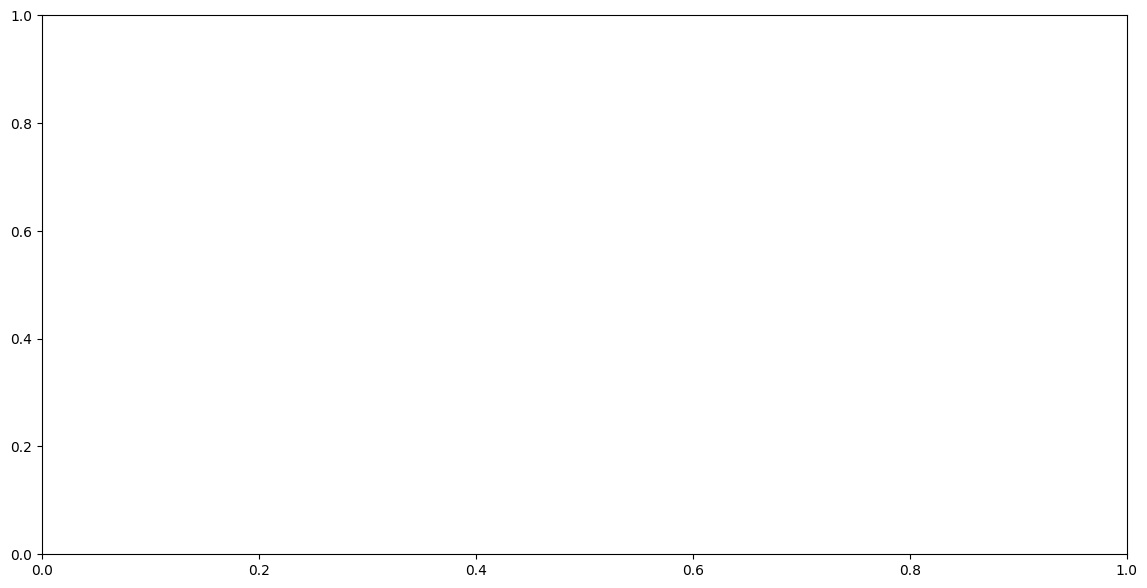

In [ ]:
import matplotlib.pyplot as plt

def evaluate_and_plot_nav(model, env, n_eval_episodes=10):
    all_navs = []
    all_dates = []

    for _ in range(n_eval_episodes):
        obs = env.reset()
        done = False
        while not done:
            action, _states = model.predict(obs, deterministic=True)
            obs, reward, done, _ = env.step(action)

        all_navs.extend(env.navs_over_time)
        all_dates.extend(env.dates_over_time)

    # Plotting NAV over dates
    plt.figure(figsize=(14, 7))
    plt.plot(all_dates[:len(all_navs)], all_navs, label='NAV')
    plt.title('NAV over Time')
    plt.xlabel('Date')
    plt.ylabel('NAV')
    plt.legend()
    plt.show()

# Make sure to initialize `test_env` with `test_df` before calling this function
test_env = AdvancedStockTradingEnv(df=test_df)
evaluate_and_plot_nav(model, test_env, n_eval_episodes=1)


In [ ]:
def evaluate_and_plot_nav_by_date(model, env, n_eval_episodes=10):
    # Assuming each episode starts at the beginning of the dataset
    dates = env.df['Date'].unique()  # Get unique dates from your dataframe
    episode_navs = []

    for episode in range(n_eval_episodes):
        obs = env.reset()
        navs = []
        done = False
        while not done:
            action, _states = model.predict(obs, deterministic=True)
            obs, rewards, done, info = env.step(action)
            navs.append(env.current_nav)  # Append current NAV

        episode_navs.append(navs)  # Store NAVs for this episode




In [ ]:
def evaluate_and_plot_nav_by_date(model, env, n_eval_episodes=10):
    # Get unique dates from your dataframe
    dates = env.df['Date'].unique()  # Ensure this matches how dates are stored in your df

    episode_navs = []
    for episode in range(n_eval_episodes):
        obs = env.reset()
        navs = []
        done = False
        while not done:
            action, _states = model.predict(obs, deterministic=True)
            obs, reward, done, info = env.step(action)
            navs.append(env.current_nav)  # Append current NAV
        episode_navs.append(navs)  # Store NAVs for this episode

    # Plotting the last episode's NAV over dates for simplicity
    plt.figure(figsize=(10, 6))
    # Ensure the length of dates matches the NAVs collected
    plt.plot(dates[:len(episode_navs[-1])], episode_navs[-1], label='NAV over Date', color='blue')
    plt.title('NAV Over Date for the Last Episode')
    plt.xlabel('Date')
    plt.ylabel('NAV')
    plt.xticks(rotation=45)  # Rotate date labels for better readability
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy

# Assuming you have already loaded your trained model, if not, load it:
model = PPO.load("ppo_stock_trading_model")

# Initialize the test environment with test_df
test_env = AdvancedStockTradingEnv(df=test_df)

# Evaluate the policy
mean_reward, std_reward = evaluate_policy(model, test_env, n_eval_episodes=10, deterministic=True)

# After evaluation, access the NAVs over time from the environment
# Note: This step assumes the last evaluation episode's NAVs. For detailed analysis across all episodes, modifications are needed.
navs_over_time = test_env.navs_over_time

# Print out rewards for evaluation
print(f"Mean reward: {mean_reward}, Std reward: {std_reward}")

# Plot NAV over time if needed
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(navs_over_time, label='NAV over time')
plt.xlabel('Step')
plt.ylabel('NAV')
plt.title('NAV over Steps in Evaluation')
plt.legend()
plt.show()


KeyError: 0

In [ ]:
import matplotlib.pyplot as plt

# Assuming `env` is your environment instance after running some episodes
navs_over_time = env.navs_over_time

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(navs_over_time, label='NAV Over Time', color='blue')
plt.title('NAV Over Steps')
plt.xlabel('Step')
plt.ylabel('NAV')
plt.legend()
plt.grid(True)
plt.show()


AttributeError: 'DummyVecEnv' object has no attribute 'navs_over_time'

In [ ]:
import matplotlib.pyplot as plt

# Assuming env is your environment instance after simulation
navs_over_time = env.navs_over_time  # This now directly uses the list you accumulated during the simulation

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(navs_over_time, label='NAV Over Steps', marker='o', linestyle='-', markersize=4)
plt.xlabel('Step')
plt.ylabel('Net Asset Value (NAV)')
plt.title('NAV Progression Over Steps')
plt.legend()
plt.grid(True)
plt.show()


AttributeError: 'DummyVecEnv' object has no attribute 'navs_over_time'

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming env is your environment instance and navs are stored in env.navs
# navs = env.navs

# # Convert NAVs to a DataFrame for easier manipulation
# nav_df = pd.DataFrame(navs, columns=['NAV'])

# # Assuming you have 'Date' information in your environment, align it with NAVs
# # For demonstration, let's create a Date range. Replace this with your actual Date data.
# nav_df['Date'] = pd.date_range(start='2020-01-01', periods=len(navs), freq='Q')

# # Calculate percentage change in NAV per quarter
# nav_df['Percentage Change'] = nav_df['NAV'].pct_change() * 100

# # Group by year and calculate annual performance
# nav_df['Year'] = nav_df['Date'].dt.year
# annual_performance = nav_df.groupby('Year')['Percentage Change'].sum()

# # Plotting
# plt.figure(figsize=(14, 7))

# # NAV over time
# plt.subplot(2, 1, 1)
# plt.plot(nav_df['Date'], nav_df['NAV'], marker='o', linestyle='-', color='b')
# plt.title('NAV Over Time')
# plt.xlabel('Date')
# plt.ylabel('NAV')

# # Annual Performance
# plt.subplot(2, 1, 2)
# annual_performance.plot(kind='bar', color='green')
# plt.title('Annual Percentage Change in NAV')
# plt.xlabel('Year')
# plt.ylabel('Percentage Change')

# plt.tight_layout()
# plt.show()
